In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def s(delta,omega,xi,ufun):
    return ufun(delta) * np.exp(xi*omega*delta) * np.sin(omega*delta*np.sqrt(1-xi**2))
def w(delta,omega,xi,ufun):
    return ufun(delta) * np.exp(xi*omega*delta) * np.cos(omega*delta*np.sqrt(1-xi**2))

def A(t,omega,xi,ufun):
    S = scipy.integrate.quad(s, 0, np.inf, args=(omega,xi,ufun),limit=500)[0]
    W = scipy.integrate.quad(w, 0, np.inf, args=(omega,xi,ufun),limit=500)[0]
    A = omega / np.sqrt(1-xi**2) * np.exp(xi*omega*t) * np.sqrt(S**2 + W**2)
    return A

In [3]:
def plotfun(ufun):
    Fs = np.linspace(0.,4.,401)
    omegas = 2*np.pi*Fs
    xis = np.arange(0.0,0.05,0.01)
    As = np.array([[A(1.1,omega,xi,ufun) for xi in xis] for omega in omegas])
    taus = np.linspace(-0.1,1.1,221)
    us = [ufun(tau) for tau in taus]
    #
    fig, ax = plt.subplots(2, 1, figsize=(10, 10))
    ax[0].plot(taus,us)
    ax[0].set_xlabel('τ')
    ax[0].set_ylabel('Smoothing function')
    nXis = len(xis)
    colors = plt.cm.viridis(np.linspace(0,0.95,nXis))
    for xi_idx in range(0,nXis):
        ax[1].plot(Fs,As[:,xi_idx],color=colors[xi_idx])
    ax[1].set_xlabel('Frequency ratio')
    ax[1].set_ylabel('Vibration amplitude')
    

In [4]:
def limitTo01(ufun):
    def ulim(tau):
        if tau<0.0 or tau>1.0:
            return 0.0
        return ufun(tau)
    return ulim

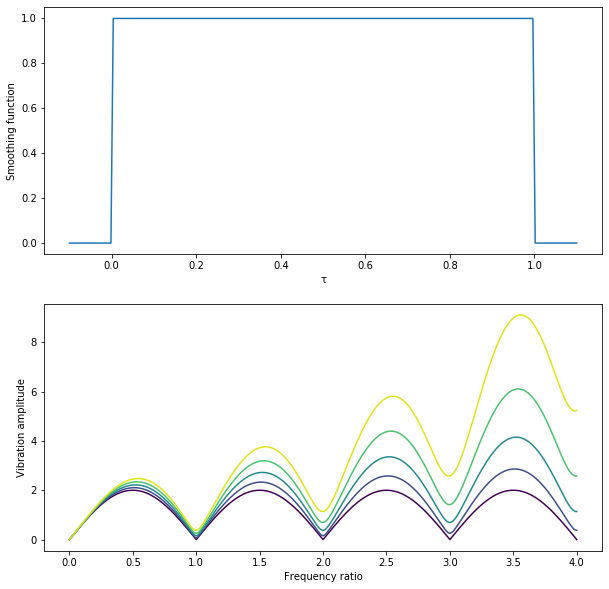

In [5]:
def u(tau):
    return 1.0

plotfun(limitTo01(u))

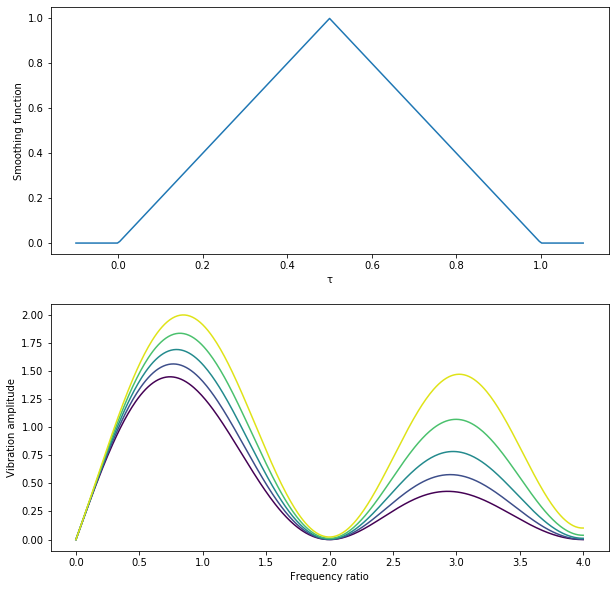

In [6]:
def u(tau):
    return 2*min(tau,1-tau)

plotfun(limitTo01(u))

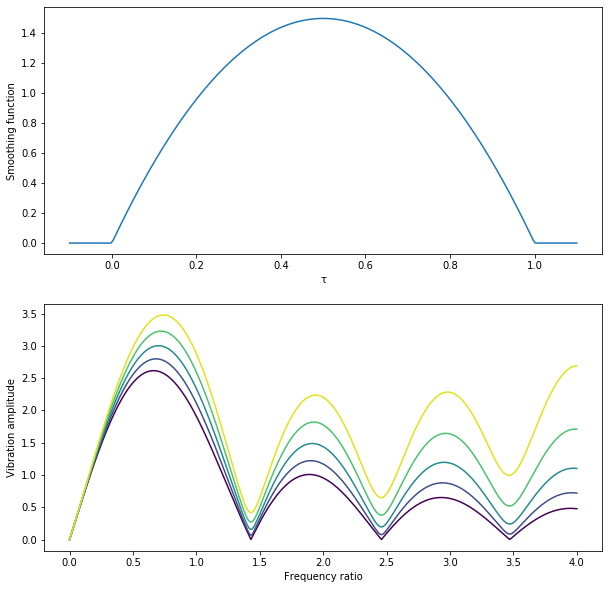

In [7]:
def u(tau):
    return 6* (0.25-(tau-0.5)**2)

plotfun(limitTo01(u))

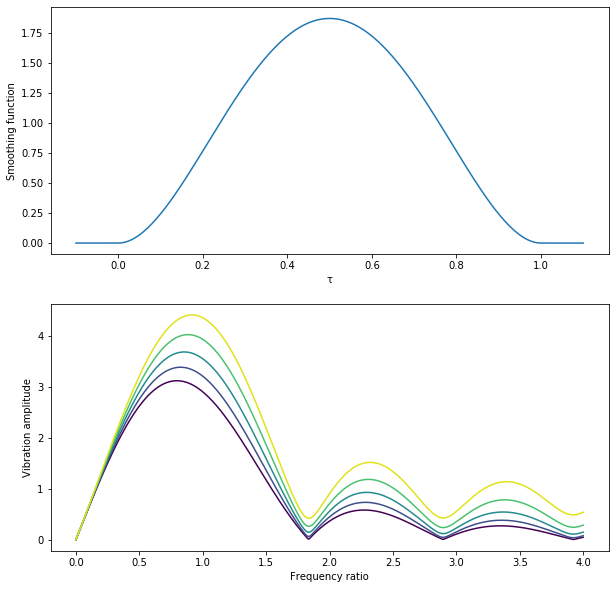

In [8]:
def u(tau):
    return 30* tau**2 * (tau-1)**2

plotfun(limitTo01(u))

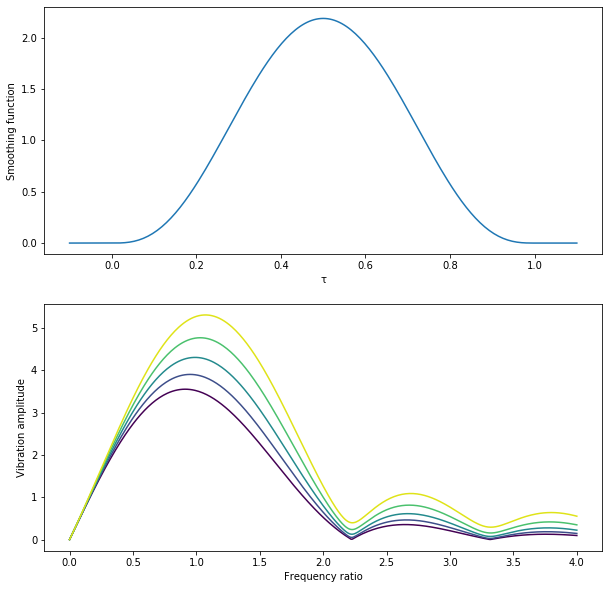

In [9]:
def u(tau):
    return -140* tau**3 * (tau-1)**3

plotfun(limitTo01(u))

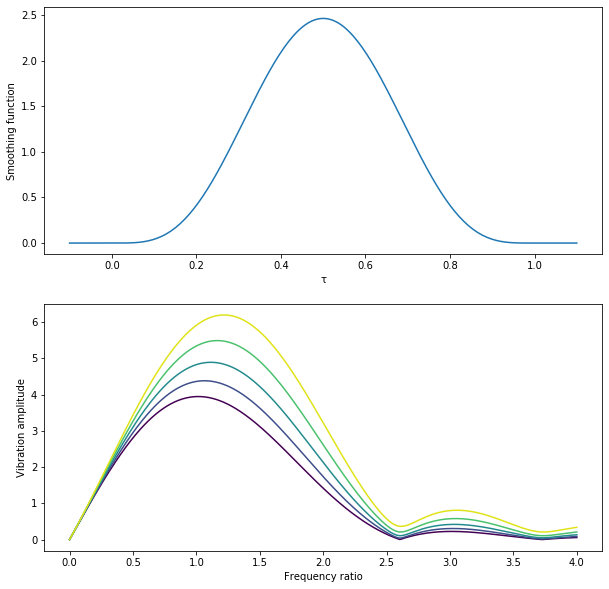

In [10]:
def u(tau):
    return 630* tau**4 * (tau-1)**4

plotfun(limitTo01(u))

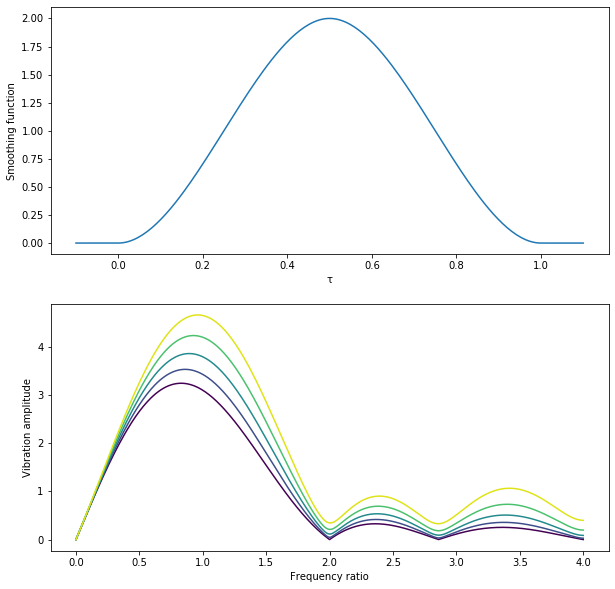

In [11]:
def u(tau):
    return 2*(1-np.abs(2*tau-1))**2*(2*np.abs(2*tau-1)+1)

plotfun(limitTo01(u))

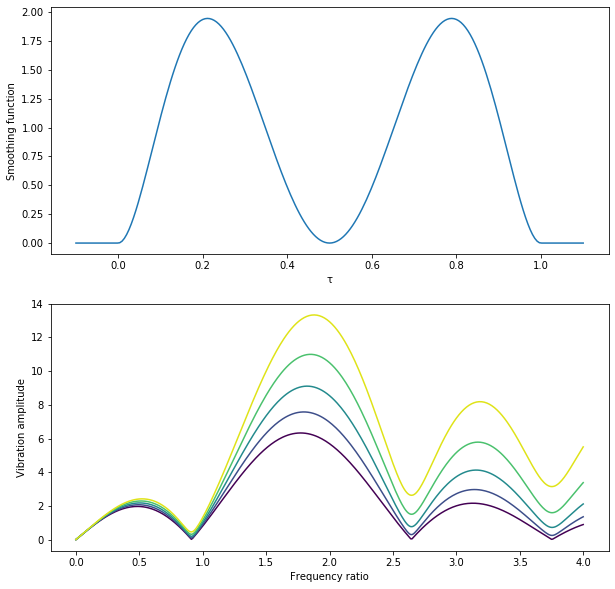

In [12]:
def u(tau):
    return 840* tau**2 * (tau-1)**2 * (tau-0.5)**2

plotfun(limitTo01(u))

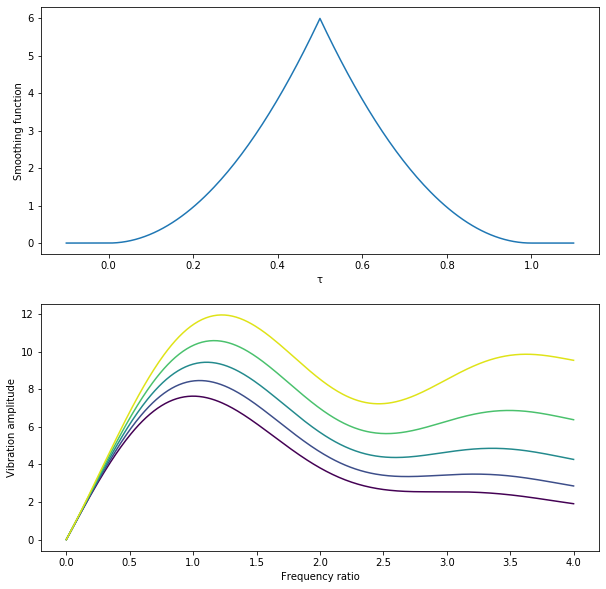

In [13]:
def u(tau):
    return 24*min((tau)**2, (tau-1)**2)

plotfun(limitTo01(u))

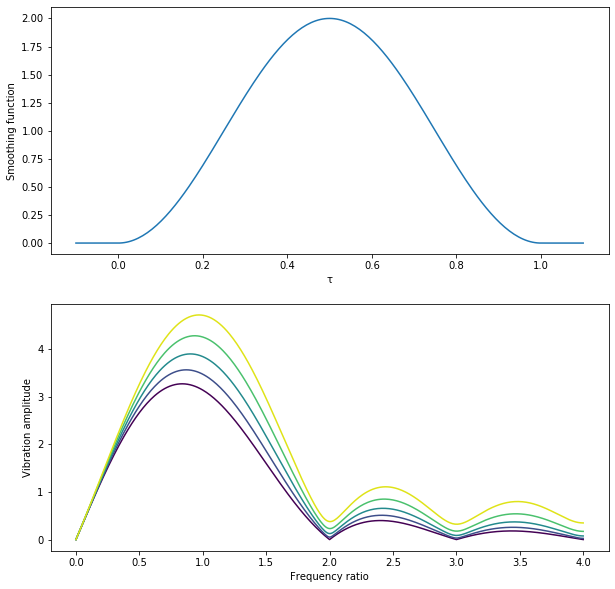

In [14]:
def u(tau):
    return 1-np.cos(tau*2*np.pi)

plotfun(limitTo01(u))